# Word2Vec con "Harry Potter and the Prisoner of Azkaban"
Este análisis tiene los siguientes objetivos:
- Crear embeddings Word2Vec usando Gensim.
- Probar términos de interés y explicar similitudes.
- Graficar en 2D los embeddings seleccionados.
- Sacar conclusiones sobre las relaciones semánticas.


## 2. Importar librerias

In [1]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## 3. Cargar el libro

In [3]:
with open('HP_books/03 Harry Potter and the Prisoner of Azkaban.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()


## 4. Dividir en lineas y tokenizar

In [4]:
lines = raw_text.split('\n')
sentences = [simple_preprocess(line) for line in lines if line.strip() != '']


## 5. Entrenar modelo Word2Vec

In [5]:
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)


## 6. Palabras similares

In [6]:
words_to_test = ['harry', 'hermione', 'ron', 'sirius', 'lupin', 'dumbledore', 'snape']

for word in words_to_test:
    if word in model.wv:
        print(f"\nPalabras similares a '{word}':")
        for sim_word, score in model.wv.most_similar(word, topn=5):
            print(f" - {sim_word} ({score:.2f})")
    else:
        print(f"\nLa palabra '{word}' no está en el vocabulario.")



Palabras similares a 'harry':
 - staring (1.00)
 - stood (1.00)
 - ron (1.00)
 - bed (1.00)
 - feet (1.00)

Palabras similares a 'hermione':
 - looking (1.00)
 - quickly (1.00)
 - she (1.00)
 - suddenly (1.00)
 - still (1.00)

Palabras similares a 'ron':
 - harry (1.00)
 - stared (1.00)
 - staring (1.00)
 - sat (1.00)
 - turned (1.00)

Palabras similares a 'sirius':
 - never (1.00)
 - thought (1.00)
 - done (1.00)
 - peter (1.00)
 - or (1.00)

Palabras similares a 'lupin':
 - mcgonagall (1.00)
 - trelawney (1.00)
 - dumbledore (0.99)
 - sorry (0.99)
 - neville (0.99)

Palabras similares a 'dumbledore':
 - neville (1.00)
 - now (1.00)
 - too (1.00)
 - fudge (1.00)
 - wasn (1.00)

Palabras similares a 'snape':
 - voice (1.00)
 - suddenly (1.00)
 - still (1.00)
 - crookshanks (1.00)
 - scabbers (1.00)


## 7.  Visualizar en 2D con PCA


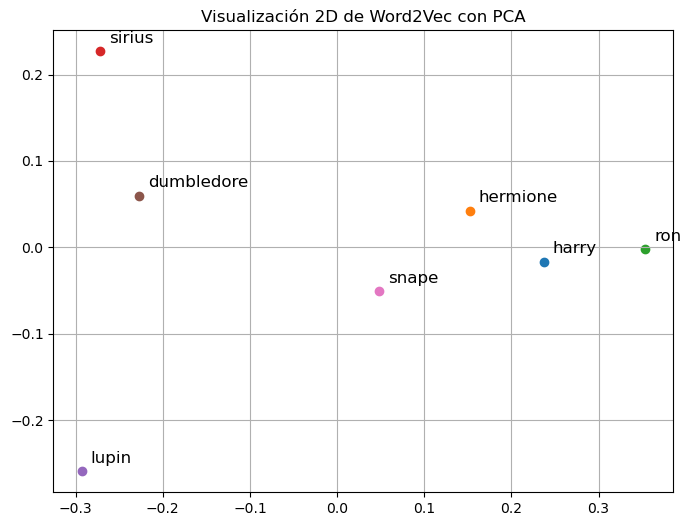

In [7]:
selected_words = ['harry', 'hermione', 'ron', 'sirius', 'lupin', 'dumbledore', 'snape']
words_vecs = [model.wv[word] for word in selected_words if word in model.wv]
pca = PCA(n_components=2)
coords = pca.fit_transform(words_vecs)

plt.figure(figsize=(8, 6))
for word, (x, y) in zip(selected_words, coords):
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Visualización 2D de Word2Vec con PCA")
plt.grid(True)
plt.show()


## Conclusiones
- Las palabras que aparecen en contextos similares tienden a agruparse (por ejemplo, `harry`, `ron` y `hermione`).
- Se observan agrupaciones semánticas relacionadas a roles similares: `sirius` y `lupin`, ambos aliados importantes de Harry.
- La visualización PCA reduce dimensiones pero puede perder parte del significado, aunque da una idea general de proximidad semántica.
- Se puede extender a más personajes, lugares y objetos mágicos para enriquecer el análisis.
